In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')



from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score




bike_data =pd.read_csv('day_s.csv')
bike_data


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [3]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
#Checking missing values
bike_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
# dropping `instant`,`dteday`,`casual`,`registered`

bike_data = bike_data.drop(columns=['instant','dteday','casual','registered'])

In [6]:
# summary statistics of numerical variables
bike_data[['temp','atemp','hum','windspeed']].describe()

,temp,atemp,hum,windspeed
count,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620
std,7.506729,8.150308,14.237589,5.195841
min,2.424346,3.953480,0.000000,1.500244
25%,13.811885,16.889713,52.000000,9.041650
50%,20.465826,24.368225,62.625000,12.125325
75%,26.880615,30.445775,72.989575,15.625589
max,35.328347,42.044800,97.250000,34.000021


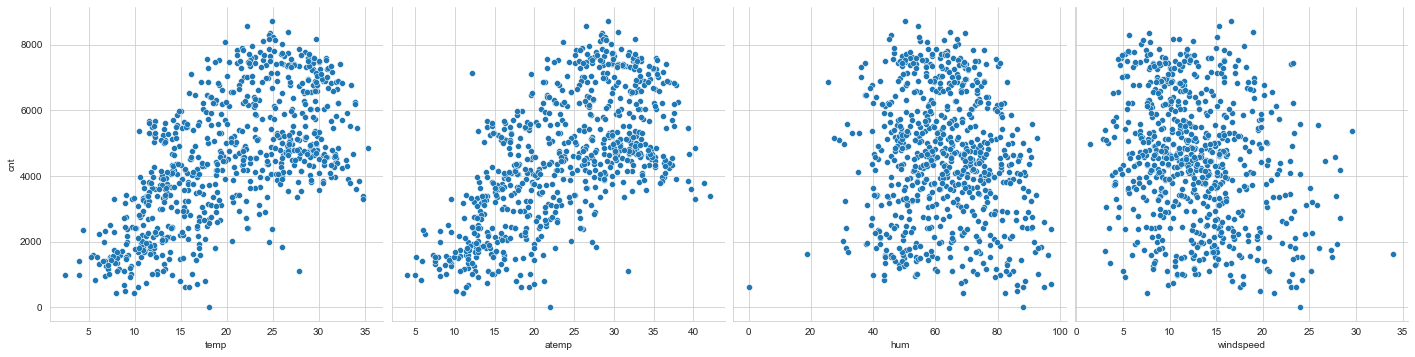

In [7]:
# Scatter Plots of Continuous variables vs 'cnt'
sns.set_style("whitegrid")
sns.pairplot(data=bike_data,x_vars=['temp','atemp','hum','windspeed'],y_vars='cnt',kind='scatter',height=5,aspect=1);

In [8]:
## Dropping outliers in continuous variables
# outliers in temp
bike_data = bike_data.drop(index = bike_data[(bike_data['temp'] > 15) & (bike_data['temp'] < 20) & (bike_data['cnt'] < 100)].index)
bike_data = bike_data.drop(index = bike_data[(bike_data['temp'] > 25) & (bike_data['temp'] < 30) & (bike_data['cnt'] < 2000)].index)


# outliers in atemp
bike_data = bike_data.drop(index = bike_data[(bike_data['atemp'] > 20) & (bike_data['atemp'] < 25) & (bike_data['cnt'] < 100)].index)
bike_data = bike_data.drop(index = bike_data[(bike_data['atemp'] > 30) & (bike_data['atemp'] < 35) & (bike_data['cnt'] < 2000)].index)


#outliers in hum
bike_data = bike_data.drop(index = bike_data[(bike_data['hum'] < 20)].index)

#outliers in windspeed
bike_data = bike_data.drop(index = bike_data[(bike_data['windspeed'] > 30)].index)

In [9]:
# Looking at correlation with continuous variables
correlation = bike_data[['temp','atemp','hum','windspeed','cnt']].corr()['cnt'].apply(lambda x : round(x,4)) #this line
correlation = pd.DataFrame(correlation).sort_values(by='cnt',ascending=False)
#correlation.drop(index=['cnt'],inplace=True)
# dropping registered,casual, instant
correlation.style.background_gradient(cmap='GnBu')

,cnt
cnt,1.000000
atemp,0.638900
temp,0.635600
hum,-0.107600
windspeed,-0.218100


In [10]:
# correlation between ```temp``` and ```atemp```
bike_data[['temp','atemp']].corr()

,temp,atemp
temp,1.000000,0.991726
atemp,0.991726,1.000000


In [11]:
# dropping ```atemp```
bike_data = bike_data.drop(columns=['atemp'])

In [12]:
bike_data[['temp','hum','windspeed']].corr()

,temp,hum,windspeed
temp,1.000000,0.122673,-0.160295
hum,0.122673,1.000000,-0.247498
windspeed,-0.160295,-0.247498,1.000000


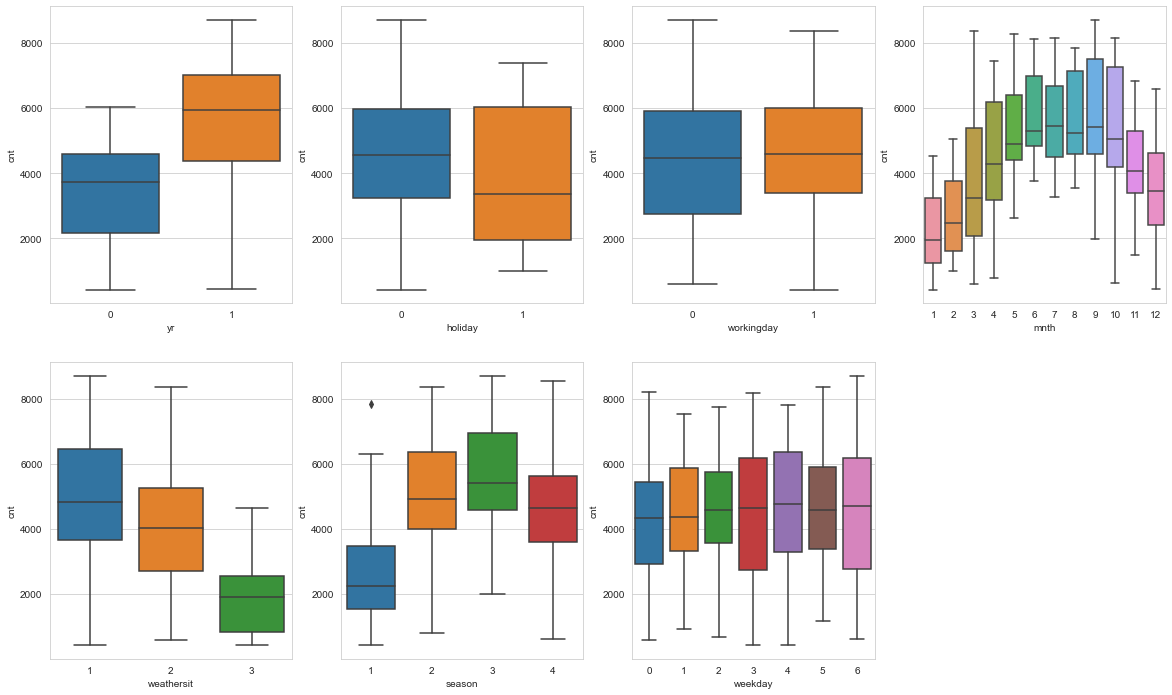

In [13]:
##Relationship between categorical and continuous variable
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_data)
plt.subplot(2,4,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_data)
plt.subplot(2,4,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_data)
plt.subplot(2,4,4)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_data)
plt.subplot(2,4,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_data)
plt.subplot(2,4,6)
sns.boxplot(x = 'season', y = 'cnt', data = bike_data)
plt.subplot(2,4,7)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_data)
plt.show()

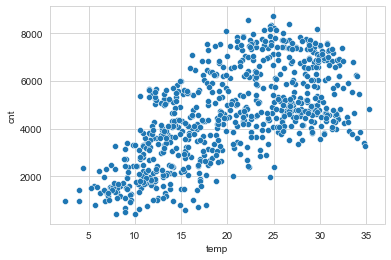

In [14]:
#scatter plot for temperature to count
sns.scatterplot(x='temp',y='cnt' ,data=bike_data)
plt.show()

In [15]:
bike_data['season']=bike_data.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
bike_data['mnth']=bike_data.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bike_data['weathersit']=bike_data.weathersit.map({1: 'Clear',2:'Cloudy',3:'Light Snow'})
bike_data['weekday']=bike_data.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


In [16]:
# Dropping outliers in Categorical Variables
bike_data = bike_data.drop(index = bike_data[(bike_data['season'] == 'spring') & (bike_data['cnt'] > 7000)].index)

<AxesSubplot:>

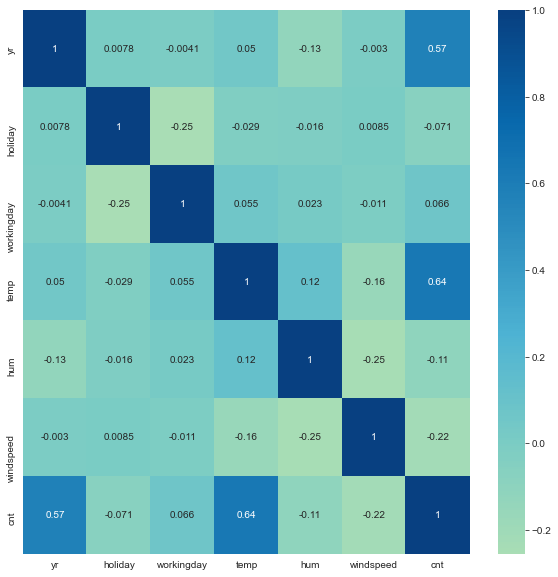

In [17]:
# correlation among variables
plt.figure(figsize=[10,10])
sns.heatmap(bike_data.corr(),cmap='GnBu',center=0,annot=True)

In [18]:
# creating indicator variable columns
season_indicators = pd.get_dummies(bike_data['season'],drop_first=True)
mnth_indicators = pd.get_dummies(bike_data['mnth'],drop_first=True)
weekday_indicators = pd.get_dummies(bike_data['weekday'],drop_first=True)
weathersit_indicators = pd.get_dummies(bike_data['weathersit'],drop_first=True)

In [19]:
# adding indicator variable columns to the dataset . Dropping original columns
bike_data = pd.concat([bike_data,season_indicators,mnth_indicators,weekday_indicators,weathersit_indicators],axis=1)
bike_data = bike_data.drop(columns=['season','mnth','weekday','weathersit'])

In [20]:
bike_data.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Cloudy,Light Snow
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [21]:
dtrain,dtest = train_test_split(bike_data,train_size=0.7,test_size=0.3,random_state=120)
print(dtrain.shape)
print(dtest.shape)

(506, 29)
(218, 29)


In [22]:
# normalization of continuous variables
from sklearn.preprocessing import MinMaxScaler
numerical_scaler = MinMaxScaler()
num_vars = ['temp','hum','windspeed','cnt']

numerical_scaler.fit(dtrain[num_vars])
dtrain[num_vars] = numerical_scaler.transform(dtrain[num_vars])

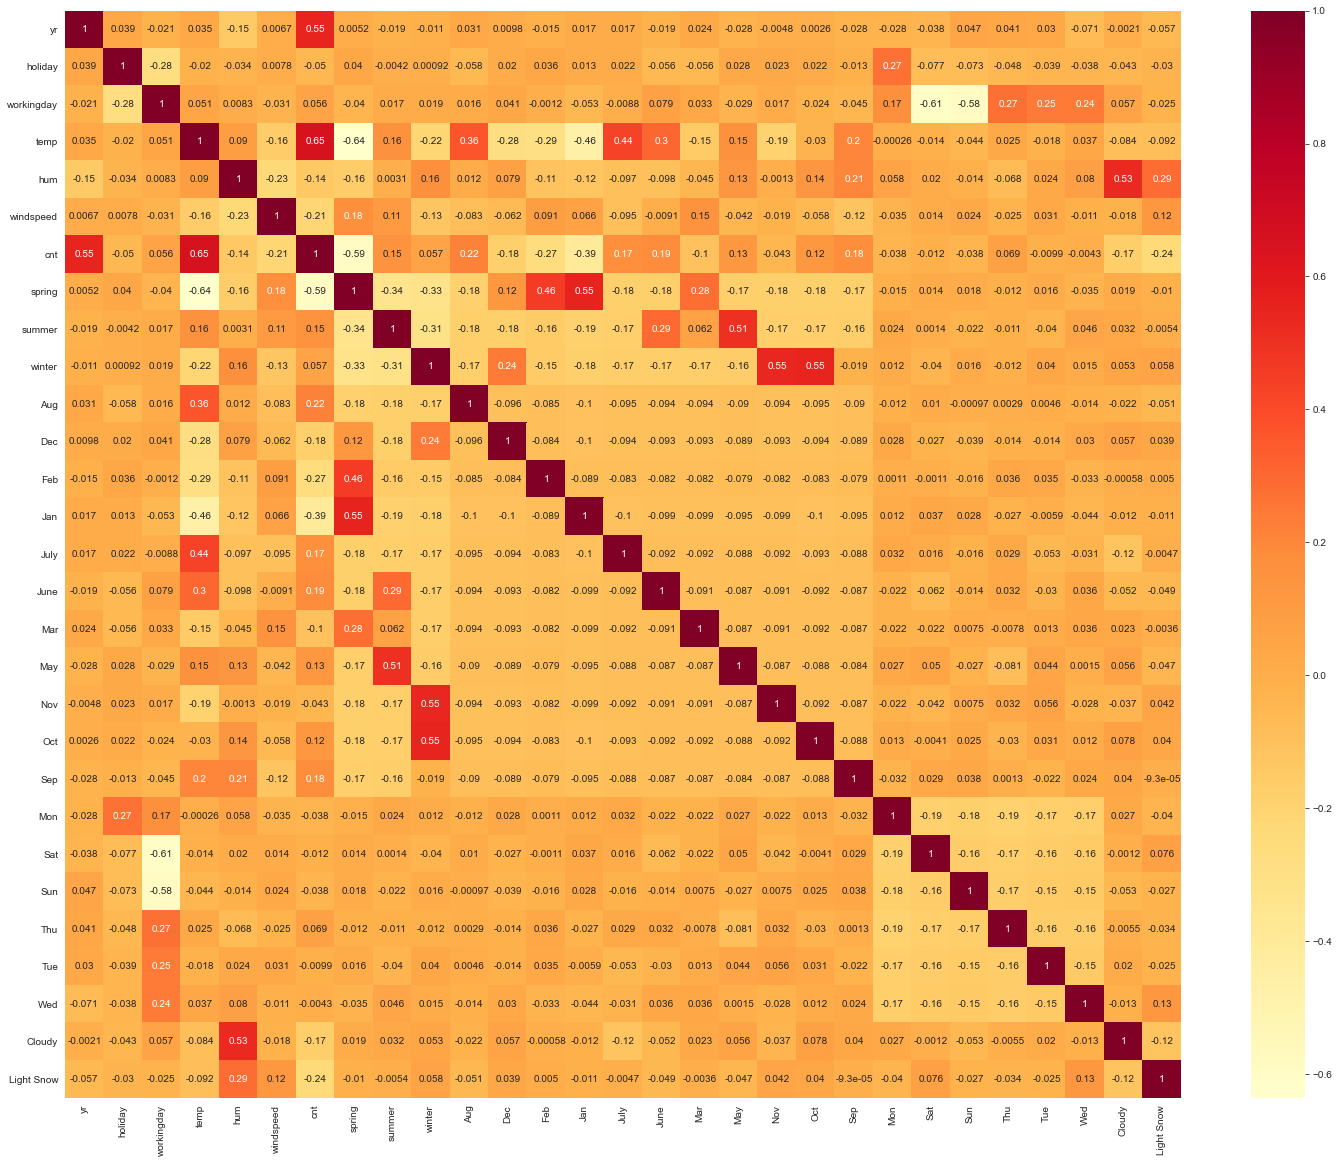

In [24]:
# Let's check the correlation coefficients to see which variables are highly correlated after scaling
#Little to no multicollinearity among predictors

plt.figure(figsize=(25, 20))
sns.heatmap(dtrain.corr(),cmap='YlOrRd',annot = True)
plt.show()

In [25]:
#Divide the data into X and y
y_train = dtrain.pop('cnt')
X_train = dtrain

In [26]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,  n_features_to_select=15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [27]:
#List of variables selected
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 14),
 ('winter', False, 2),
 ('Aug', False, 8),
 ('Dec', False, 6),
 ('Feb', False, 9),
 ('Jan', False, 3),
 ('July', True, 1),
 ('June', False, 10),
 ('Mar', True, 1),
 ('May', True, 1),
 ('Nov', False, 5),
 ('Oct', True, 1),
 ('Sep', True, 1),
 ('Mon', False, 13),
 ('Sat', True, 1),
 ('Sun', False, 4),
 ('Thu', False, 12),
 ('Tue', False, 7),
 ('Wed', False, 11),
 ('Cloudy', True, 1),
 ('Light Snow', True, 1)]

In [28]:
#Columns where RFE support is True
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'July', 'Mar', 'May', 'Oct', 'Sep', 'Sat', 'Cloudy', 'Light Snow'],
      dtype='object')

In [29]:
#Columns where RFE support is False
X_train.columns[~rfe.support_]

Index(['summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'June', 'Nov', 'Mon',
       'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

In [30]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe

,yr,holiday,workingday,temp,hum,windspeed,spring,July,Mar,May,Oct,Sep,Sat,Cloudy,Light Snow
231,0,0,0,0.795440,0.584687,0.155696,0,0,0,0,0,0,1,0,0
717,1,0,1,0.340632,0.516822,0.355128,0,0,0,0,0,0,0,0,0
107,0,0,1,0.564921,0.401392,0.303720,0,0,0,0,0,0,0,0,0
595,1,0,0,0.718600,0.636891,0.110569,0,0,0,0,0,0,0,1,0
485,1,0,1,0.690564,0.564384,0.285008,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,0,1,0.885778,0.482019,0.308383,0,1,0,0,0,0,0,0,0
10,0,0,1,0.137016,0.601667,0.199940,1,0,0,0,0,0,0,1,0
386,1,0,0,0.128804,0.754640,0.394065,1,0,0,0,0,0,0,1,0
160,0,0,1,0.867088,0.488399,0.246080,0,0,0,0,0,0,0,0,0


In [31]:
y_train.head()

231    0.574671
717    0.583846
107    0.361946
595    0.497163
485    0.640951
Name: cnt, dtype: float64

In [32]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Aug,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Cloudy,Light Snow
231,0,0,0,0.795440,0.584687,0.155696,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
717,1,0,1,0.340632,0.516822,0.355128,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
107,0,0,1,0.564921,0.401392,0.303720,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
595,1,0,0,0.718600,0.636891,0.110569,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
485,1,0,1,0.690564,0.564384,0.285008,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [33]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar',
       'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed',
       'Cloudy', 'Light Snow'],
      dtype='object')

In [34]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train_rfe)
model = sm.OLS(y_train,X_train_sm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     193.9
Date:                Mon, 18 Dec 2023   Prob (F-statistic):          6.36e-195
Time:                        11:33:39   Log-Likelihood:                 512.60
No. Observations:                 506   AIC:                            -993.2
Df Residuals:                     490   BIC:                            -925.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2686      0.026     10.454      0.0

In [35]:
vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,41.89
4,temp,2.32
5,hum,2.25
7,spring,1.98
3,workingday,1.95
13,Sat,1.80
14,Cloudy,1.76
8,July,1.42
15,Light Snow,1.41
2,holiday,1.22


In [36]:
X1=X_train.drop('summer',axis=1)

In [37]:
X_train_sm = sm.add_constant(X1)
model = sm.OLS(y_train,X_train_sm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     112.7
Date:                Mon, 18 Dec 2023   Prob (F-statistic):          1.25e-185
Time:                        11:34:23   Log-Likelihood:                 519.16
No. Observations:                 506   AIC:                            -984.3
Df Residuals:                     479   BIC:                            -870.2
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2094      0.025      8.394      0.0

In [38]:
vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,holiday,inf
3,workingday,inf
22,Sun,inf
21,Sat,inf
8,winter,8.09
7,spring,7.40
4,temp,7.03
12,Jan,6.23
17,Nov,5.46
18,Oct,5.39


In [39]:
X2=X1.drop('holiday',axis=1)

In [40]:
X_train_sm = sm.add_constant(X2)
model = sm.OLS(y_train,X_train_sm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     112.7
Date:                Mon, 18 Dec 2023   Prob (F-statistic):          1.25e-185
Time:                        11:35:09   Log-Likelihood:                 519.16
No. Observations:                 506   AIC:                            -984.3
Df Residuals:                     479   BIC:                            -870.2
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2116      0.039      5.385      0.0

In [41]:
vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,98.35
7,winter,8.09
6,spring,7.40
2,workingday,7.36
3,temp,7.03
11,Jan,6.23
20,Sat,5.76
21,Sun,5.49
16,Nov,5.46
17,Oct,5.39


In [42]:
X3=X2.drop('June',axis=1)

In [43]:
X_train_sm = sm.add_constant(X3)
model = sm.OLS(y_train,X_train_sm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     117.4
Date:                Mon, 18 Dec 2023   Prob (F-statistic):          1.16e-186
Time:                        11:35:54   Log-Likelihood:                 519.14
No. Observations:                 506   AIC:                            -986.3
Df Residuals:                     480   BIC:                            -876.4
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2120      0.039      5.405      0.0

In [44]:
vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,98.13
7,winter,8.09
6,spring,7.40
2,workingday,7.32
11,Jan,6.21
19,Sat,5.75
20,Sun,5.46
15,Nov,5.34
3,temp,5.21
16,Oct,5.09


In [45]:
X4=X3.drop('Feb',axis=1)

In [46]:
X_train_sm = sm.add_constant(X4)
model = sm.OLS(y_train,X_train_sm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     122.6
Date:                Mon, 18 Dec 2023   Prob (F-statistic):          1.06e-187
Time:                        11:36:39   Log-Likelihood:                 519.11
No. Observations:                 506   AIC:                            -988.2
Df Residuals:                     481   BIC:                            -882.6
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2097      0.038      5.588      0.0

In [47]:
vif = pd.DataFrame()
X = X_train_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,90.02
2,workingday,7.32
7,winter,6.55
18,Sat,5.75
19,Sun,5.46
3,temp,4.45
15,Oct,3.73
14,Nov,3.70
6,spring,3.41
9,Dec,2.40


In [48]:
y_train_pred= model.predict(X_train_sm)

<AxesSubplot:ylabel='Density'>

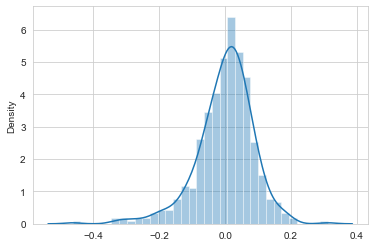

In [49]:
res= y_train-y_train_pred
sns.distplot(res)

In [50]:
numerical_scaler = MinMaxScaler()
num_vars = ['temp','hum','windspeed','cnt']

numerical_scaler.fit(dtest[num_vars])
dtest[num_vars] = numerical_scaler.transform(dtest[num_vars])
dtest.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Cloudy,Light Snow
73,0,0,1,0.301126,0.563739,0.404911,0.161852,1,0,0,...,0,0,0,0,0,0,1,0,1,0
465,1,0,1,0.343806,0.287543,0.682405,0.523730,0,1,0,...,0,0,0,0,0,0,0,1,0,0
218,0,0,0,0.880705,0.708102,0.447869,0.384834,0,0,0,...,0,0,0,0,1,0,0,0,0,0
501,1,0,1,0.677336,0.362400,0.517859,0.848981,0,1,0,...,0,0,0,0,0,1,0,0,0,0
234,0,0,1,0.742096,0.266544,0.311019,0.656951,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [51]:
dtest.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Cloudy,Light Snow
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,...,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,0.541284,0.018349,0.678899,0.547767,0.512130,0.406622,0.512791,0.211009,0.275229,0.270642,...,0.082569,0.091743,0.082569,0.133028,0.169725,0.114679,0.178899,0.178899,0.321101,0.022936
std,0.499440,0.134517,0.467974,0.239054,0.198933,0.180566,0.244643,0.408964,0.447658,0.445314,...,0.275863,0.289327,0.275863,0.340386,0.376255,0.319367,0.384150,0.384150,0.467974,0.150043
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.336494,0.346476,0.278793,0.354527,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.553497,0.502474,0.398132,0.509672,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.769932,0.655691,0.511658,0.695576,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
y_test = dtest.pop('cnt')
X_test = dtest

In [53]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Cloudy,Light Snow
73,1.0,0,0,1,0.301126,0.563739,0.404911,1,0,0,...,0,0,0,0,0,0,1,0,1,0
465,1.0,1,0,1,0.343806,0.287543,0.682405,0,1,0,...,0,0,0,0,0,0,0,1,0,0
218,1.0,0,0,0,0.880705,0.708102,0.447869,0,0,0,...,0,0,0,0,1,0,0,0,0,0
501,1.0,1,0,1,0.677336,0.362400,0.517859,0,1,0,...,0,0,0,0,0,1,0,0,0,0
234,1.0,0,0,1,0.742096,0.266544,0.311019,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [54]:

X_test_sm=X_test_sm.drop(['Feb','June','holiday','summer'],axis=1)

In [55]:
#predict
Y_test_pred = model.predict(X_test_sm)

In [56]:
#evaluate
r2_score(y_true=y_test, y_pred =Y_test_pred)


0.8330460346289775